In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
#让所有的变量或者声明都能显示出来
InteractiveShell.ast_node_interactivity = 'all'

import xgboost as xgb
import sys
sys.path.append(r'E:\1-OneDrive\OneDrive\1-Machine Learning\2-Machine Learning Algorithm\MLall\models\gylearn')
from model_selection.GridsearchTemplate import GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification

# 准备玩具数据集并划分数据

数据集地址：
https://github.com/microsoft/LightGBM/tree/master/examples/regression

In [3]:
path =  r'C:\Users\29259\Desktop'
df_train=pd.read_csv(path+r"\regression.train",header=None,sep='\t')
df_test=pd.read_csv(path+r"\regression.test",header=None,sep='\t')
df_train
df_test

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,0.869,-0.635,0.226,0.327,-0.690,0.754,-0.249,-1.092,0.000,...,-0.010,-0.046,3.102,1.354,0.980,0.978,0.920,0.722,0.989,0.877
1,1,0.908,0.329,0.359,1.498,-0.313,1.096,-0.558,-1.588,2.173,...,-1.139,-0.001,0.000,0.302,0.833,0.986,0.978,0.780,0.992,0.798
2,1,0.799,1.471,-1.636,0.454,0.426,1.105,1.282,1.382,0.000,...,1.129,0.900,0.000,0.910,1.108,0.986,0.951,0.803,0.866,0.780
3,0,1.344,-0.877,0.936,1.992,0.882,1.786,-1.647,-0.942,0.000,...,-0.678,-1.360,0.000,0.947,1.029,0.999,0.728,0.869,1.027,0.958
4,1,1.105,0.321,1.522,0.883,-1.205,0.681,-1.070,-0.922,0.000,...,-0.374,0.113,0.000,0.756,1.361,0.987,0.838,1.133,0.872,0.808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1,0.433,0.852,-1.542,1.366,0.726,1.085,-0.534,-1.507,0.000,...,0.489,0.883,3.102,0.897,0.972,0.990,0.604,1.151,0.947,1.158
6996,0,0.416,-1.352,0.839,0.854,1.269,0.978,-0.442,-1.513,2.173,...,-0.947,-0.406,0.000,4.819,2.601,0.983,0.871,0.915,1.898,1.486
6997,0,0.535,1.359,1.126,1.322,-1.572,1.203,1.087,-1.301,1.087,...,-2.137,-0.134,0.000,0.789,0.844,0.992,0.815,3.348,1.654,1.385
6998,0,1.719,0.561,1.517,0.784,-1.006,0.942,0.932,0.153,0.000,...,0.179,-0.663,3.102,0.866,0.917,1.229,0.758,0.469,0.615,0.697


,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,0.644,0.247,-0.447,0.862,0.374,0.854,-1.126,-0.790,2.173,...,-0.190,-0.744,3.102,0.958,1.061,0.980,0.875,0.581,0.905,0.796
1,0,0.385,1.800,1.037,1.044,0.349,1.502,-0.966,1.734,0.000,...,-0.440,0.638,3.102,0.695,0.909,0.981,0.803,0.813,1.149,1.116
2,0,1.214,-0.166,0.004,0.505,1.434,0.628,-1.174,-1.230,1.087,...,-1.383,1.355,0.000,0.848,0.911,1.043,0.931,1.058,0.744,0.696
3,1,0.420,1.111,0.137,1.516,-1.657,0.854,0.623,1.605,1.087,...,0.731,1.424,3.102,1.597,1.282,1.105,0.730,0.148,1.231,1.234
4,0,0.897,-1.703,-1.306,1.022,-0.729,0.836,0.859,-0.333,2.173,...,-2.019,-0.289,0.000,0.805,0.930,0.984,1.430,2.198,1.934,1.684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0.745,1.586,1.578,0.863,-1.423,0.530,1.714,1.085,0.000,...,0.832,-0.248,3.102,0.910,1.164,0.983,0.947,0.858,0.928,0.823
496,0,0.677,-1.014,-1.648,1.455,1.461,0.596,-2.358,0.517,0.000,...,-0.977,0.378,3.102,2.210,1.423,0.982,1.074,1.623,1.417,1.258
497,1,0.815,-1.263,0.057,1.018,-0.208,0.339,-0.347,-1.646,2.173,...,1.698,-0.698,0.000,1.022,1.058,1.000,0.784,0.477,0.886,0.836
498,0,3.512,-1.094,-0.220,0.338,-0.328,1.962,-1.099,1.544,1.087,...,0.155,1.249,0.000,1.173,1.366,0.993,2.259,2.000,1.626,1.349


In [4]:
y_train = df_train[0].values
y_test = df_test[0].values
X_train = df_train.drop(0, axis=1).values
X_test = df_test.drop(0, axis=1).values

In [5]:
df_train[0].values

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

# 模型超参数调优训练

**注意：**
1. 这里我用的是sklearn网格搜索，只不过加了自己的东西，例如可视化调参结果。
2. 这里使用的XGB，是sklearn接口的，方便。
3. 只针对某一个参数进行调优，方便看出欠/过拟合的现象


## 针对max_depth超参数调优

Starting Grid Search xgb

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   16.6s finished


Grid Search Suceess xgb



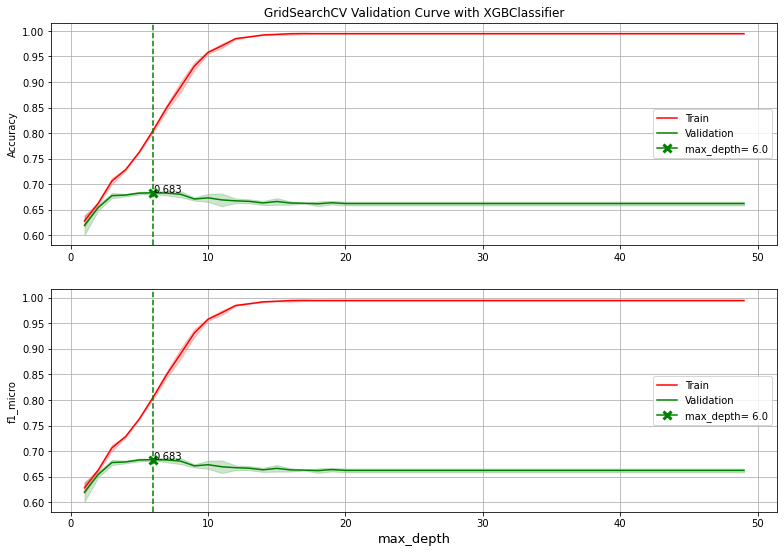

In [7]:
#%%
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
refit = 'f1_micro'
scoring = {'f1_micro': 'f1_micro', 'Accuracy':  make_scorer(accuracy_score)}

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0) # n_splits=1才是留出法
cv = 3

xgb_param_grid = {'max_depth': range(1, 50, 1)}


model_and_param = [ 
                    {"name":'xgb',
                     "estimator":xgb.XGBClassifier(random_state = 0,n_estimators=5),
                     "feature_sel":None,
                     "preprocessing":None,
                     "param_grid": xgb_param_grid,
                    },
                  ]

grid_search = GridSearch(param = model_and_param,
                         cv = cv,
                         scoring=scoring,
                         refit=refit,
                         plot_search = True)
all_gs_results = grid_search.fit(X_train,y_train)   
best_estimaters_list = [_.best_estimator_ for name,_ in all_gs_results.items()]

## 针对n_estimators超参数调优

Starting Grid Search xgb

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1346s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  20 tas

Grid Search Suceess xgb



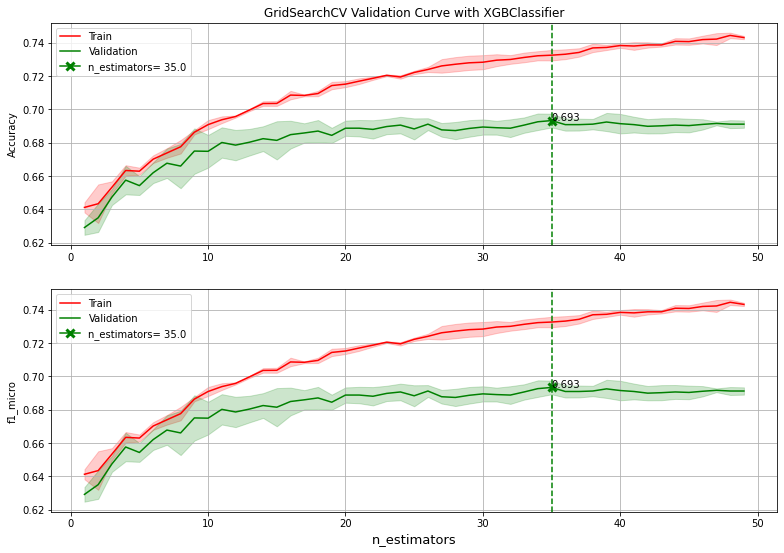

In [8]:
#%%
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
refit = 'f1_micro'
scoring = {'f1_micro': 'f1_micro', 'Accuracy':  make_scorer(accuracy_score)}

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0) # n_splits=1才是留出法
cv = 3

xgb_param_grid = {'n_estimators': range(1, 50, 1)}


model_and_param = [ 
                    {"name":'xgb',
                     "estimator":xgb.XGBClassifier(random_state = 0,max_depth=2),
                     "feature_sel":None,
                     "preprocessing":None,
                     "param_grid": xgb_param_grid,
                    },
                  ]

grid_search = GridSearch(param = model_and_param,
                         cv = cv,
                         scoring=scoring,
                         refit=refit,
                         plot_search = True)
all_gs_results = grid_search.fit(X_train,y_train)   
best_estimaters_list = [_.best_estimator_ for name,_ in all_gs_results.items()]